# Exercise 0 Linear regression

## 0. Simulate phone dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Intercept: 35.487
Slope: 1.905


<AxesSubplot:xlabel='clean_Minutes_called', ylabel='clean_Cost_per_month'>

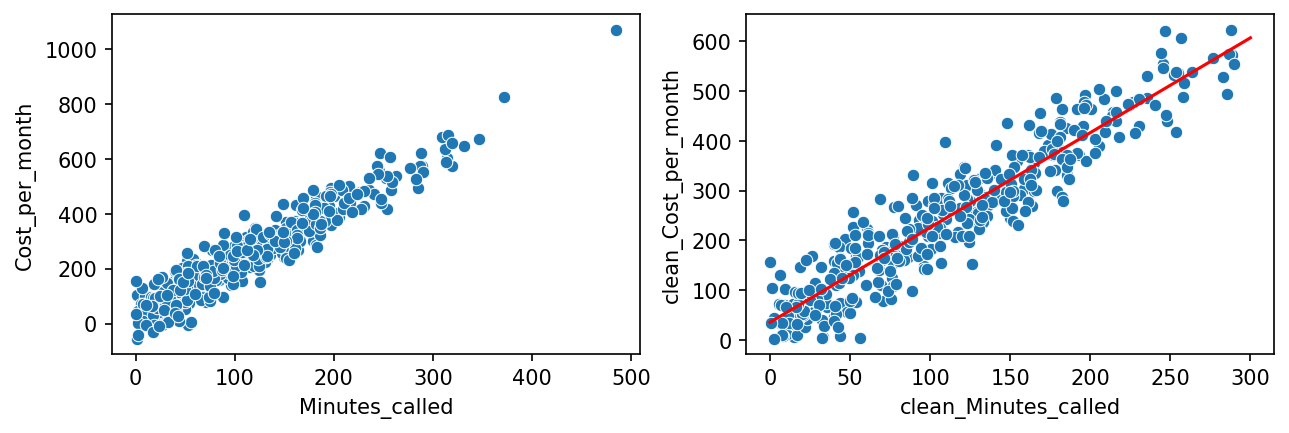

In [22]:
np.random.seed(42)

x_data = (np.random.normal(loc=100, scale=100, size=(400)))
error_data = (np.random.normal(loc=0, scale=50, size=(400)))
    
x_data = np.absolute(x_data)

y_data = 2 * x_data + 25 + error_data

phone_data = pd.DataFrame([x_data, y_data]).T
phone_data = phone_data.rename({0: "Minutes_called", 1: "Cost_per_month"}, axis="columns")

x_above_300 = phone_data[phone_data.Minutes_called > 300].reset_index().rename({"index": "rows_to_drop"}, axis="columns")
x_rows_to_drop = list(x_above_300["rows_to_drop"])
y_bellow_0 = phone_data[phone_data.Cost_per_month < 0].reset_index().rename({"index": "rows_to_drop"}, axis="columns")
y_rows_to_drop = list(y_bellow_0["rows_to_drop"])
x_rows_to_drop.extend(y_rows_to_drop)

clean_phone_data = phone_data.drop(x_rows_to_drop,
                                             axis="rows").reset_index(drop=True).rename(
                                                {"Minutes_called": "clean_Minutes_called", "Cost_per_month": "clean_Cost_per_month"}, axis="columns")

beta_1, beta_0 = np.polyfit(clean_phone_data.clean_Minutes_called, clean_phone_data.clean_Cost_per_month, deg=1)

def y_hat(x): return beta_0 + beta_1*x
subscription = np.linspace(0, 300)

print(f"Intercept: {beta_0:.3f}")
print(f"Slope: {beta_1:.3f}")
fig, ax = plt.subplots(1, 2, figsize=(10, 3), dpi=150)
sns.scatterplot(data = phone_data, x="Minutes_called", y="Cost_per_month", ax = ax[0])
sns.scatterplot(data=clean_phone_data, x="clean_Minutes_called", y="clean_Cost_per_month", ax = ax[1])
sns.lineplot(x= subscription, y = y_hat(subscription), color="red", ax = ax[1])
# sns.lineplot(x=np.linspace(0, 500), y=0, ax=ax[0], color="green") # Adds green line to mark of all values bellow zero

In [4]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction = 0.7, random_state=42, replace = False):
    """For when inputing dataframe use DataFrame["Name of column to be used"]"""
    X_train, y_train = X.sample(n = int(len(X)*train_fraction), random_state=random_state, replace=replace), y.sample(n = int(len(y)*train_fraction), random_state=random_state, replace=replace)
    X_test, y_test = X.drop(X_train.index), y.drop(y_train.index)
    X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test)
    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)
    return (X_train, X_test, y_train, y_test)

(X_train, X_test, y_train, y_test) = train_test_split(clean_phone_data["clean_Minutes_called"], clean_phone_data["clean_Cost_per_month"])

print(f"Length of X_train: {len(X_train)}, Length of X_test: {len(X_test)}, Length of y_train: {len(y_train)}, Length of y_test: {len(y_test)}")
print(f"Lenght of train data and test data combined is: {len(X_train) + len(X_test)}")
for dataset in ["X_train", "X_test", "y_train", "y_test"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")

Length of X_train: 266, Length of X_test: 115, Length of y_train: 266, Length of y_test: 115
Lenght of train data and test data combined is: 381
Shape of X_train: (266, 2)
Shape of X_test: (115, 2)
Shape of y_train: (266,)
Shape of y_test: (115,)


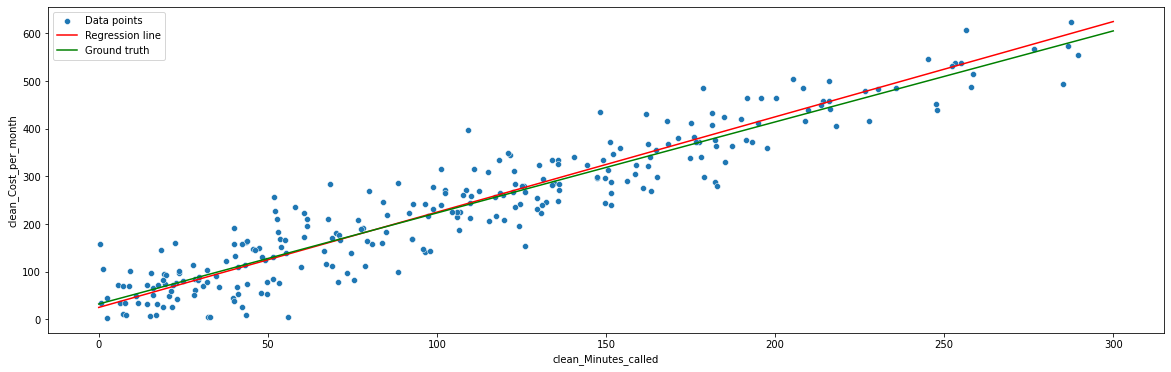

In [84]:
(X_train, X_test, y_train, y_test) = train_test_split(clean_phone_data["clean_Minutes_called"], clean_phone_data["clean_Cost_per_month"])
regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

x = np.linspace(0, 300)

plt.figure(figsize = (20, 6))
sns.scatterplot(x=X_train["clean_Minutes_called"], y=y_train)
sns.lineplot(x=x, y=25+2*x, color="red")
sns.lineplot(x=x, y=beta_hat[0]+beta_hat[1]*x, color="green")
plt.legend(["Data points", "Regression line", "Ground truth"])